# Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Ques 1.

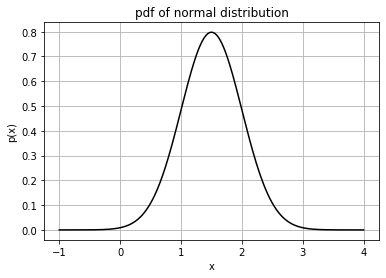

In [2]:
mu, sigma = 1.5, 0.5
x = np.linspace(-1, 4, 1000)

#Plotting pdf of normal distribution of mean 1.5 and standard deviation 0.5
gaus = stats.norm(mu, sigma)
plt.figure()
plt.plot(x, gaus.pdf(x), color='black')
plt.title('pdf of normal distribution')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid()
plt.show()

In [3]:
sample = gaus.rvs(1000)     #1000 draws from above normal distribution

#sample parameters
s_mean = np.sum(sample)/np.size(sample)
print("mean", s_mean)
s_var = np.sum(np.square(sample - s_mean))/(np.size(sample)-1)
print("variance", s_var)
s_stdev = np.sqrt(np.sum(np.square(sample - s_mean))/(np.size(sample)-1))
print("standard deviation", s_stdev)
s_skew = np.sum(np.power(sample - s_mean,3))/np.size(sample)
s_skew = s_skew / np.power(s_stdev,3)
print("skewness", s_skew)
s_kurt = np.sum(np.power(sample - s_mean,4))/np.size(sample)
s_kurt = s_kurt / np.power(s_stdev,4) 
print("kurtosis", s_kurt)

mean 1.5107966220205185
variance 0.2672651724245257
standard deviation 0.5169769554095479
skewness -0.0011591814848186288
kurtosis 2.9707635431079087


In [4]:
#sample parameters using MAD
mad = np.median(np.abs(sample - np.median(sample)))
print("MAD", mad)

#std dev using MAD
stdev = 1.482 * mad
print("standard deviation using MAD", stdev)

#using sigma_G
q25,q50,q75 = np.percentile(sample, [25,50,75])
sigma_G = 0.7413 * (q75 - q25)

mean = q50
print("mean", mean)
print("sigma_G", sigma_G)
print("median", np.median(sample))

MAD 0.3620005625411882
standard deviation using MAD 0.5364848336860408
mean 1.522983617965758
sigma_G 0.5288906446058449
median 1.522983617965758


### Ques 2.

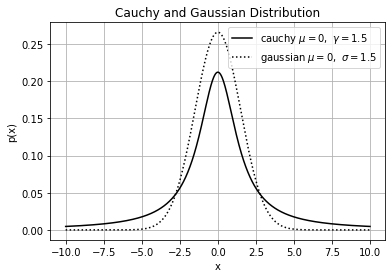

In [5]:
x = np.linspace(-10,10,1000)
dist1 = stats.cauchy(0, 1.5)
dist2 = stats.norm(0, 1.5)

plt.figure()
plt.plot(x, dist1.pdf(x), ls='-', color='black', label=r'cauchy $\mu=0,\ \gamma=1.5$')
plt.plot(x, dist2.pdf(x), ls=':', color='black', label=r'gaussian $\mu=0,\ \sigma=1.5$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid()
plt.title('Cauchy and Gaussian Distribution')
plt.legend()
plt.show()

### Ques 3. 

/home/krati/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


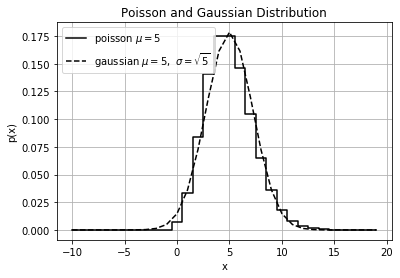

In [6]:
x = np.arange(-10,20)
dist1 = stats.poisson(5)
dist2 = stats.norm(5, np.sqrt(5))

plt.figure()
plt.plot(x, dist1.pmf(x), linestyle='steps-mid', color='black', label=r'poisson $\mu=5$')
plt.plot(x, dist2.pdf(x), ls='--', color='black', label=r'gaussian $\mu=5,\ \sigma=\sqrt{5}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid()
plt.title('Poisson and Gaussian Distribution')
plt.legend()
plt.show()

### Ques 4. 

In [7]:
#measurements of K meson
x = np.array([0.8920, 0.881, 0.8913, 0.9837, 0.8958])
del_x = np.array([0.00044, 0.009, 0.00032, 0.00048, 0.00045])

weighted_mean = np.sum(np.divide(x, np.square(del_x)))/np.sum(np.divide(np.ones(5),np.square(del_x)))  #weighted mean
print("weighted mean lifetime: ", weighted_mean)

mean_del_x = 1/np.sum(np.divide(np.ones(5),np.square(del_x)))   #error in mean
print("uncertainty of mean: ", mean_del_x)

weighted mean lifetime:  0.9089185199574897
uncertainty of mean:  4.128510743662294e-08


### Ques 5.

In [8]:
import csv
import pandas as pd

df = pd.read_csv(r'file1.csv')  #reading csv file as a dataframe
#print(df)

In [9]:
data = pd.DataFrame(df, columns=['eccentricity'])   #extracting eccentricity column
data = data.dropna(axis=0)    #dropping rows that have null values
#print(data.shape)

e = data.to_numpy()   #converting into a numpy array
print(e.shape)

(1755, 1)


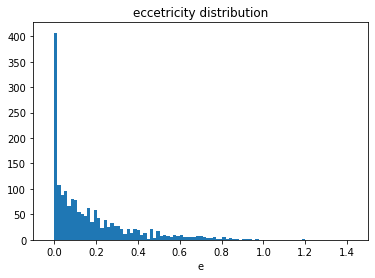

In [10]:
#plotting histogram of distribution
plt.figure()
plt.hist(e, bins=200)
plt.xlim(-0.1,1.5)
plt.title('eccetricity distribution')
plt.xlabel('e')
plt.show()

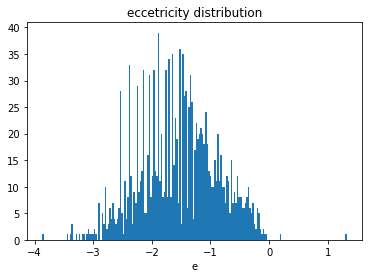

In [11]:
#Gaussianizing the distribution 
e = e[e != 0.0] #dropping rows that have e=0 (as input argument array of boxcox function must have positive values)
xt,_ = stats.boxcox(e)   #Box-transformation

plt.figure()
plt.hist(xt, bins=200)
plt.title('eccetricity distribution')
plt.xlabel('e')
plt.show()